# Business Analysis

## User Engagement Analysis

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore', category= pd.errors.SettingWithCopyWarning)

In [3]:
import os
import sys

sys.path.append((os.path.abspath('../scripts')))

from Utils import *
from Overview_analyzer import *

DbConn = DatabaseConn()


#### Loading data from database

In [4]:
data = DbConn.load_data_from_database()

In [5]:
data_utils = DataUtils(data)
data = data_utils.data_cleaning()

>>>>>>> The data has been cleaned and outliers removed. 
The number of null values in your data are 0


In [6]:
overview_analyzer = OverviewAnalyzer(data)

In [7]:
user_behaviour_MSISDN = overview_analyzer.user_behaviour_Id('MSISDN/Number', data)

#### The top 10 customers

In [8]:
user_behaviour_MSISDN[['Total_sessions', 'Total_sessions', 'Total_data']].head(11)

,Total_sessions,Total_sessions,Total_data
MSISDN/Number,,,
0.000000e+00,496,496,238157.896644
3.362632e+10,18,18,7601.897489
3.362578e+10,17,17,8105.869982
3.361489e+10,17,17,8436.419004
3.365973e+10,16,16,7348.883422
3.376054e+10,15,15,8120.321239
3.367588e+10,15,15,7525.549515
3.366716e+10,13,13,5358.118109
3.362708e+10,12,12,5488.139018


In [9]:
user_behaviour_MSISDN = user_behaviour_MSISDN.iloc[1:]

**Observtion**
- The above table show the top 10 customers the first customer that has MSISDN of 0 are unknown customers

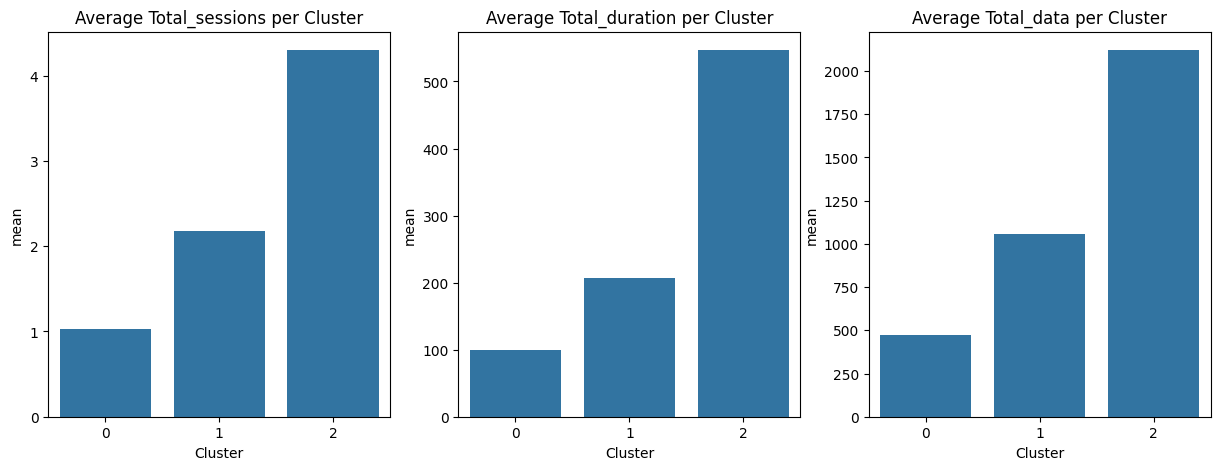

In [10]:
cols = ['Total_sessions', 'Total_duration', 'Total_data']
data, cluster_stats = data_utils.cluster_analysis(cols, data=user_behaviour_MSISDN, n_clusters=3)

**Interpretation:**
- Cluster 0: This cluster has the least amount of engaged customers
- Cluster 1: As we can see cluster 1 are more engaged that cluster 0.
- Cluster 2: Cluster 2 are the most engaged customer.

*Note*: Each cluster represents a different group of customers based on their engagement level. 



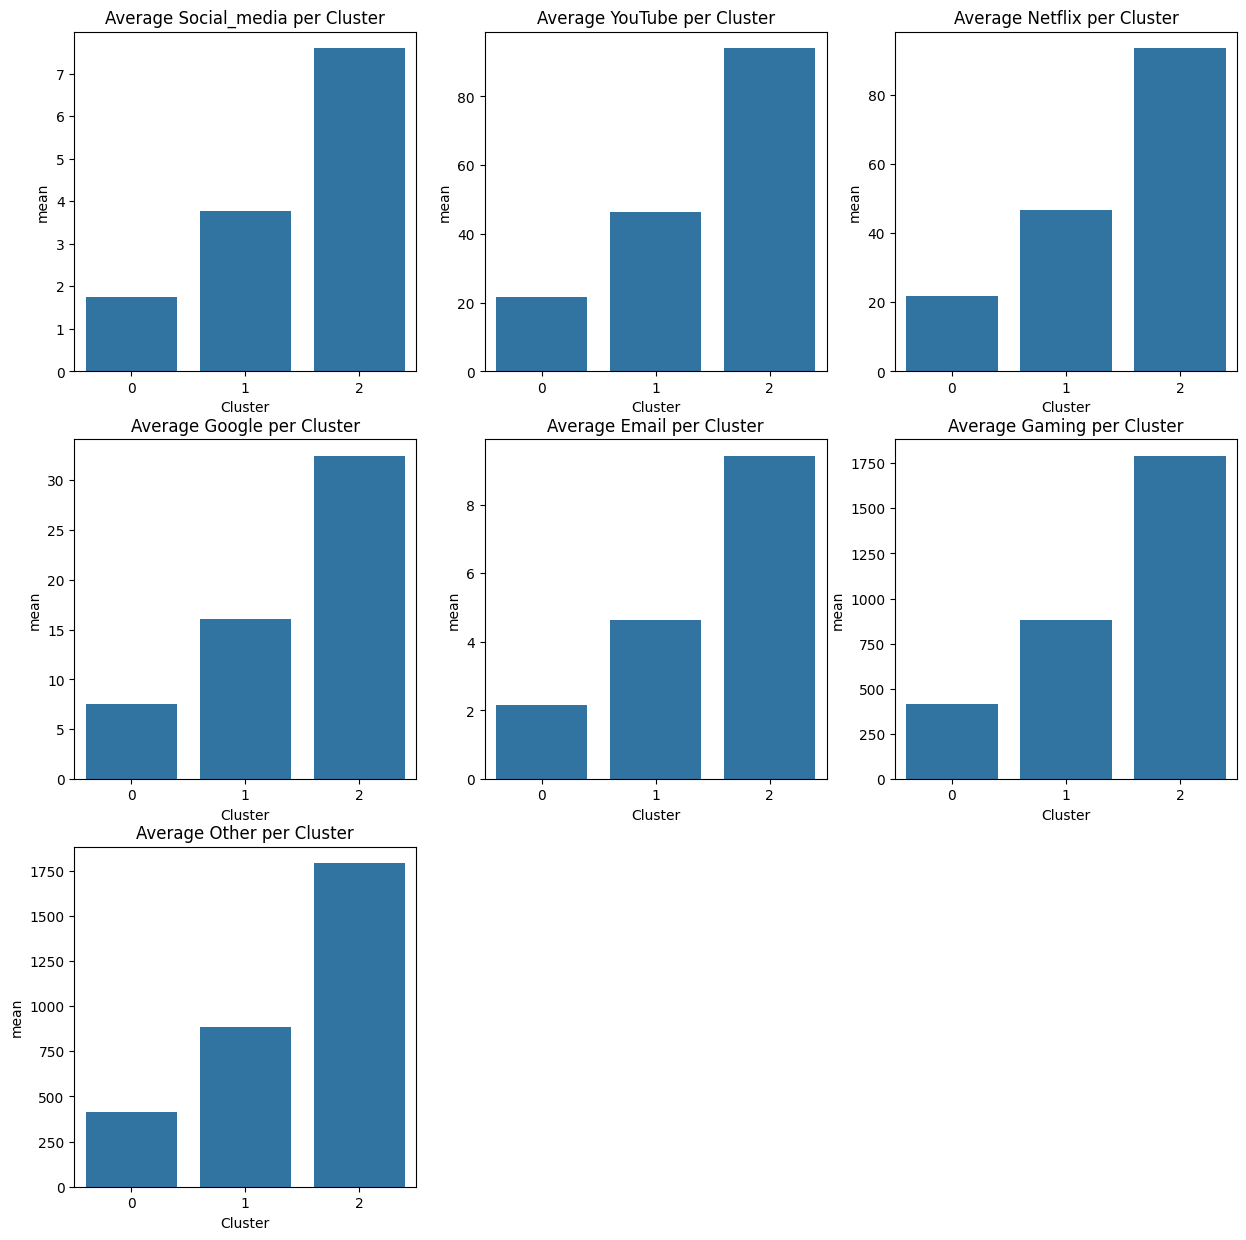

In [11]:
apps = ['Social_media', 'YouTube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
data, cluster_stats = data_utils.cluster_analysis(apps, data=user_behaviour_MSISDN, n_clusters=3)


**Observation**
- From the above table we can see that cluster 2 is the cluster with the most activity regarding duration
- Netflix and YouTube almost have the same number of enggaed users.
- Other and Gaming have the same number of enggaed users, and these users are more enggaged compared to other categories.

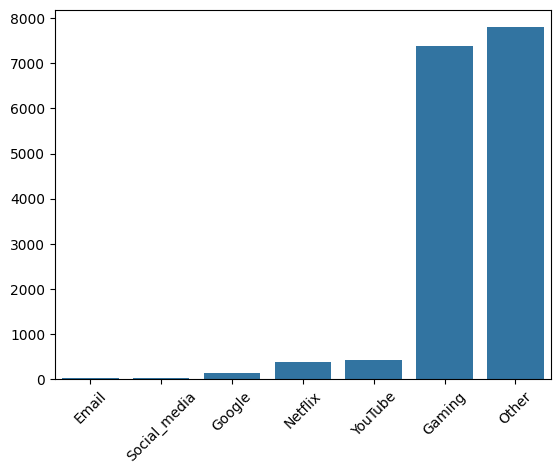

In [12]:
app_metrics = user_behaviour_MSISDN[['Social_media', 'YouTube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']]

sns.barplot(app_metrics.max().sort_values())
plt.xticks(rotation= 45);

**Observation**
- We can see that Gaming and other are more engaging than other apps

In [13]:
# top 10 most engaged users
app_metrics.sort_values(['Other', 'Gaming'], ascending=False).head(10)

,Social_media,YouTube,Netflix,Google,Email,Gaming,Other
MSISDN/Number,,,,,,,
3.362632e+10,41.365413,357.134864,313.497295,145.141460,40.453703,6568.500629,7789.495255
3.361489e+10,26.983780,376.100748,344.658895,122.045314,38.899073,7390.434488,7285.369465
3.367588e+10,18.332406,302.706310,294.774207,104.771139,30.054494,6647.651288,6483.569288
3.362578e+10,25.878429,431.975144,340.443236,135.715404,38.751570,6987.260329,6060.202681
3.360313e+10,22.008729,270.929469,248.421117,82.901970,24.985213,3997.273056,6033.583521
3.365973e+10,33.771856,246.039474,381.011085,111.118646,34.332077,6413.993083,6024.756896
3.362695e+10,16.138079,190.816154,250.551290,66.745708,16.672886,3988.039579,5059.669382
3.362708e+10,16.983901,294.485830,254.670045,83.089753,22.475451,4742.005292,4880.705729
3.376127e+10,13.824539,260.152428,278.560010,92.592228,19.792291,4076.098441,4842.547834


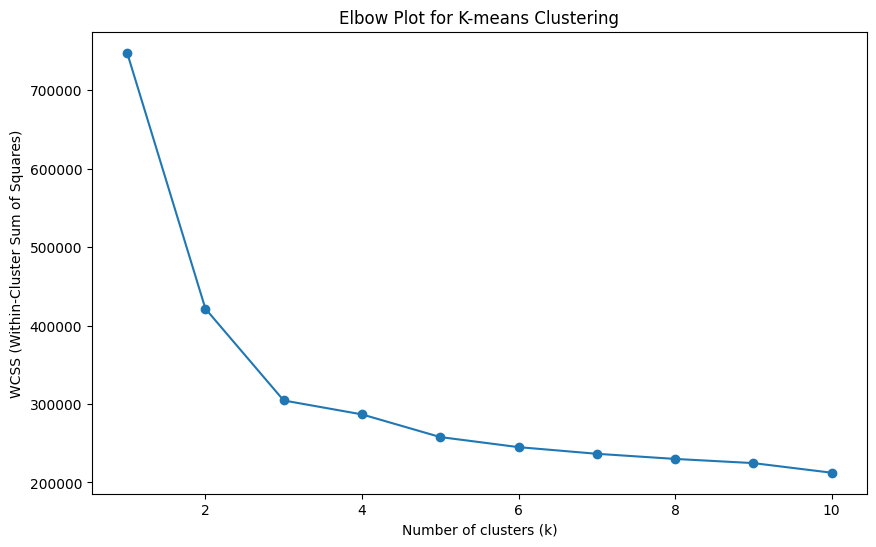

In [14]:
cols = ['Social_media', 'YouTube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
data_utils.kmean_elbow(cols, user_behaviour_MSISDN)

**Observation** 
- The number of clusters that should be used is 3